In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

import pickle #for saving and loading data
import glob #for finding files

In [5]:
data_files = glob.glob("*Sawtooth_113ma*.p")
print("Found files: \n", data_files)

Found files: 
 ['Oscillations_Sawtooth_113ma_0820_10Hz.p', 'Oscillations_Sawtooth_113ma_0820_12.5Hz.p', 'Oscillations_Sawtooth_113ma_0820_15Hz.p', 'Oscillations_Sawtooth_113ma_0820_2.5Hz.p', 'Oscillations_Sawtooth_113ma_0820_5Hz.p', 'Oscillations_Sawtooth_113ma_0820_7.5Hz.p']


In [6]:
data = pickle.load(open(data_files[4], 'rb'))

In [12]:
data

{'Fs': 5000.0,
 'axis': 'x-axis',
 'dataOut': array([2.5  , 2.5  , 2.5  , ..., 1.512, 1.508, 1.504]),
 'inputData_0': array([ 0.06575234,  0.06246363,  0.05654394, ..., -0.01021696,
        -0.01350567, -0.00232404]),
 'inputData_1': array([0.03253633, 0.03549617, 0.01609276, ..., 0.0673967 , 0.04963764,
        0.03648278]),
 'inputData_2': array([3.47846149, 3.47813262, 3.47846149, ..., 3.96749671, 3.96289248,
        3.95927487]),
 'inputData_3': array([3.91553464, 3.91520577, 3.91553464, ..., 3.91520577, 3.91553464,
        3.91586351])}

In [29]:
data['inputData_2'].shape

(7500,)

In [14]:
#let's make a variable for the time
time = np.arange(0, len(data['dataOut']))/data['Fs']

In [15]:
#Set up a color palette
stageX_color = 'tab:blue'
stageY_color = 'tab:orange'
qpdX_color = 'tab:green'
qpdY_color = 'tab:red'
output_color = 'tab:brown'

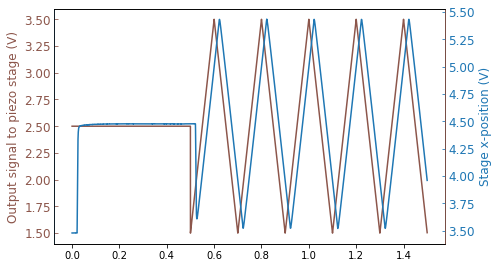

In [17]:
fig,ax = plt.subplots(figsize=(7,7/1.618)) #create figure

ax2 = ax.twinx() #this will allow us to have two separate y-axes

ax.plot(time, data['dataOut'],'-', ms=1, color=output_color, label="Output signal to stage")
ax2.plot(time, data['inputData_2'],'-', ms=1, color=stageX_color, label="x-position")
ax2.set_xlabel("Time (s)", fontsize=12)
ax.set_ylabel("Output signal to piezo stage (V)", fontsize=12, color=output_color)
ax2.set_ylabel("Stage x-position (V)", fontsize=12, color=stageX_color)

ax.tick_params(axis='y', direction='in', which='both', right=False, top=True, labelsize=12, colors=output_color)
ax2.tick_params(axis='y', direction='in', which='both', right=True, top=True, labelsize=12, colors=stageX_color)
ax2.spines['right'].set_color(output_color)
ax.spines['left'].set_color(stageX_color)

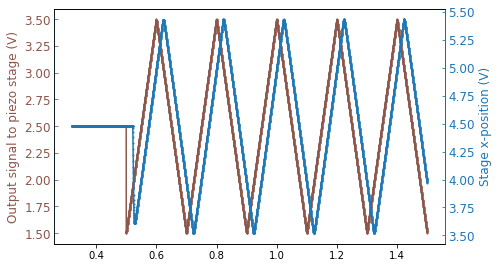

In [33]:
fig,ax = plt.subplots(figsize=(7,7/1.618)) #create figure

ax2 = ax.twinx() #this will allow us to have two separate y-axes

starting_pt = 1600

ax.plot(time[starting_pt:], data['dataOut'][starting_pt:],'-o', ms=1, color=output_color, label="Output signal to stage")
ax2.plot(time[starting_pt:], data['inputData_2'][starting_pt:],'-o', ms=1, color=stageX_color, label="x-position")
ax2.set_xlabel("Time (s)", fontsize=12)
ax.set_ylabel("Output signal to piezo stage (V)", fontsize=12, color=output_color)
ax2.set_ylabel("Stage x-position (V)", fontsize=12, color=stageX_color)

ax.tick_params(axis='y', direction='in', which='both', right=False, top=True, labelsize=12, colors=output_color)
ax2.tick_params(axis='y', direction='in', which='both', right=True, top=True, labelsize=12, colors=stageX_color)
ax2.spines['right'].set_color(output_color)
ax.spines['left'].set_color(stageX_color)

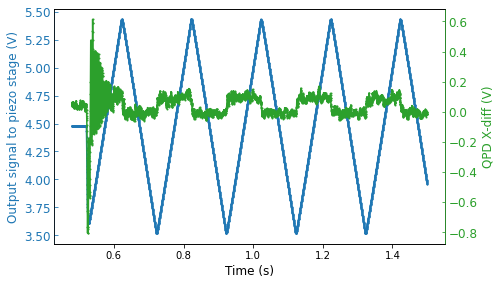

In [18]:
fig,ax = plt.subplots(figsize=(7,7/1.618)) #create figure

ax2 = ax.twinx() #this will allow us to have two separate y-axes

starting_pt = 2400

ax.plot(time[starting_pt:], data['inputData_2'][starting_pt:],'-o', ms=1, color=stageX_color, label="x-position")
ax2.plot(time[starting_pt:], data['inputData_0'][starting_pt:],'-o', ms=1, color=qpdX_color, label="QPD X-diff")
ax.set_xlabel("Time (s)", fontsize=12, color='k')
ax.set_ylabel("Output signal to piezo stage (V)", fontsize=12, color=stageX_color)
ax2.set_ylabel("QPD X-diff (V)", fontsize=12, color=qpdX_color)

ax.tick_params(axis='y', direction='in', which='both', right=False, top=True, labelsize=12, colors=stageX_color)
ax2.tick_params(axis='y', direction='in', which='both', right=True, top=True, labelsize=12, colors=qpdX_color)
ax2.spines['right'].set_color(qpdX_color)
ax.spines['left'].set_color(stageX_color)

plt.savefig("stageposition_qpdsignal.png", dpi=300)

<IPython.core.display.Javascript object>


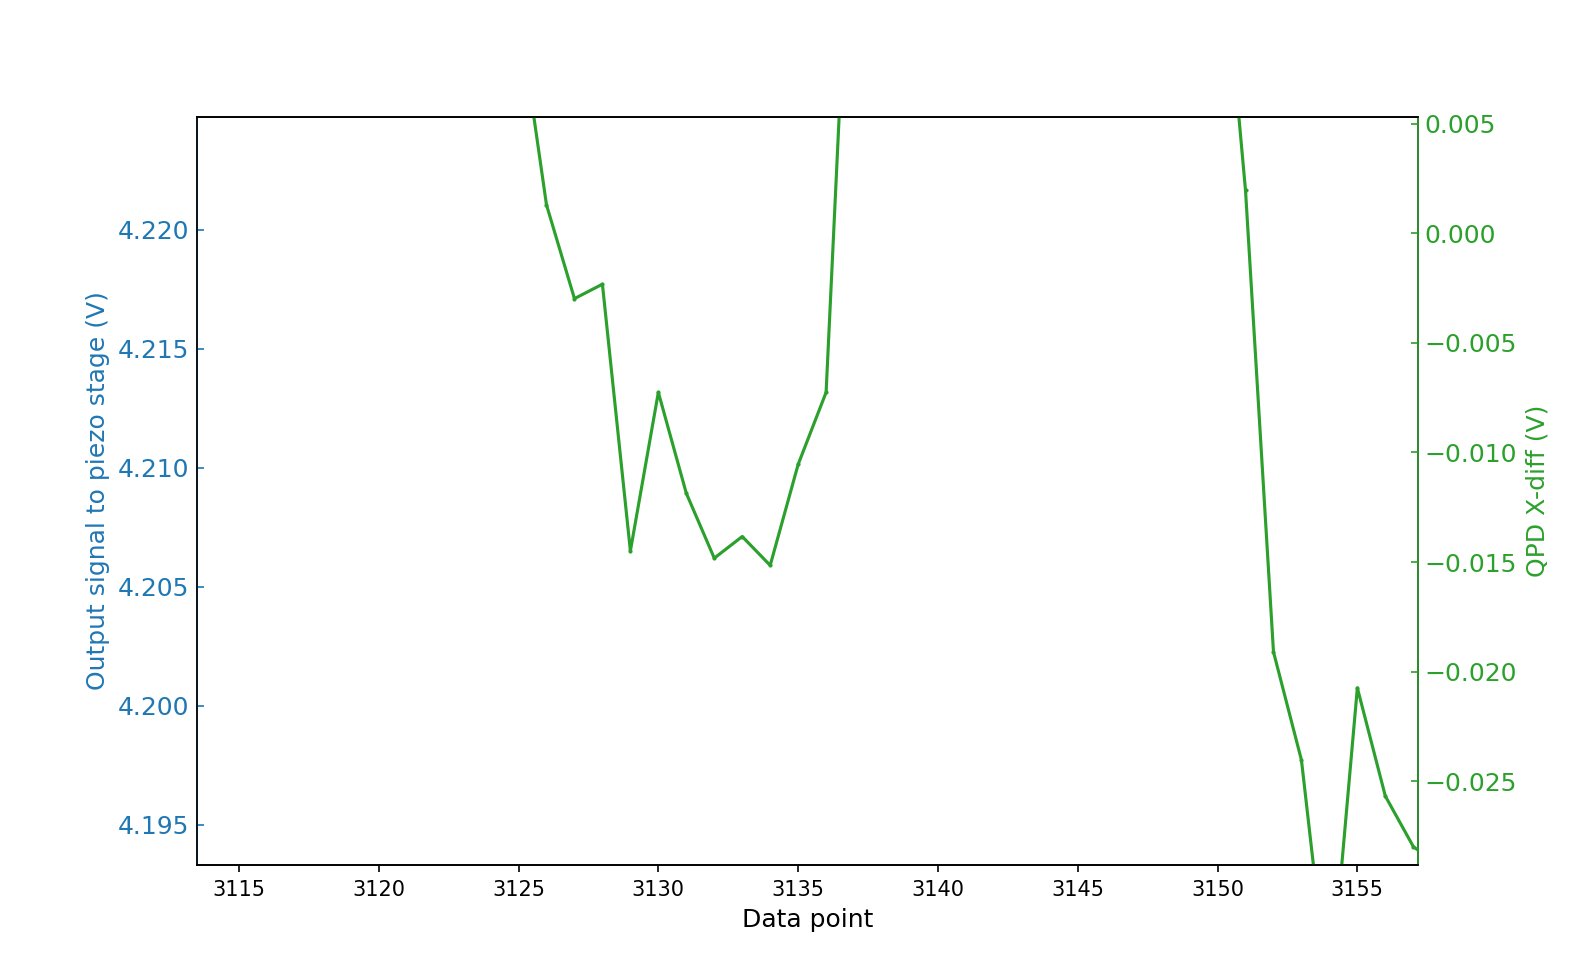

In [21]:
%matplotlib notebook

fig,ax = plt.subplots(figsize=(7,7/1.618)) #create figure

ax2 = ax.twinx() #this will allow us to have two separate y-axes

starting_pt = 0

ax.plot(data['inputData_2'][starting_pt:],'-o', ms=1, color=stageX_color, label="x-position")
ax2.plot(data['inputData_0'][starting_pt:],'-o', ms=1, color=qpdX_color, label="QPD X-diff")
ax.set_xlabel("Data point", fontsize=12, color='k')
ax.set_ylabel("Output signal to piezo stage (V)", fontsize=12, color=stageX_color)
ax2.set_ylabel("QPD X-diff (V)", fontsize=12, color=qpdX_color)

ax.tick_params(axis='y', direction='in', which='both', right=False, top=True, labelsize=12, colors=stageX_color)
ax2.tick_params(axis='y', direction='in', which='both', right=True, top=True, labelsize=12, colors=qpdX_color)
ax2.spines['right'].set_color(qpdX_color)
ax.spines['left'].set_color(stageX_color)

In [22]:
starting_data_pt = 3120

freq_of_oscillation = 5.0
cycle_in_data_pts = (1/freq_of_oscillation)*data['Fs']
print("Period of cycle in data points: ", cycle_in_data_pts)

Period of cycle in data points:  1000.0


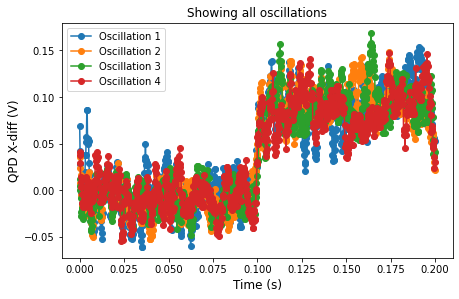

In [29]:
%matplotlib inline

fig,ax = plt.subplots(figsize=(7,7/1.618)) #create figure

starting_pt = 3122

plt.title("Showing all oscillations")

time_of_cycle = np.arange(cycle_in_data_pts)/data['Fs']

ax.plot(time_of_cycle, data['inputData_0'][starting_pt:starting_pt+int(cycle_in_data_pts)],'-o', label="Oscillation 1")
ax.plot(time_of_cycle, data['inputData_0'][starting_pt+int(cycle_in_data_pts):starting_pt+int(2*cycle_in_data_pts)],'-o', label="Oscillation 2")
ax.plot(time_of_cycle, data['inputData_0'][starting_pt+int(2*cycle_in_data_pts):starting_pt+int(3*cycle_in_data_pts)],'-o', label="Oscillation 3")
ax.plot(time_of_cycle, data['inputData_0'][starting_pt+int(3*cycle_in_data_pts):starting_pt+int(4*cycle_in_data_pts)],'-o', label="Oscillation 4")


ax.set_xlabel("Time (s)", fontsize=12, color='k')
ax.set_ylabel("QPD X-diff (V)", fontsize=12)

plt.legend()

In [30]:
avg_qpd_signal = (1/4)*(data['inputData_0'][starting_pt:starting_pt+int(cycle_in_data_pts)] + \
data['inputData_0'][starting_pt+int(cycle_in_data_pts):starting_pt+int(2*cycle_in_data_pts)] + \
data['inputData_0'][starting_pt+int(2*cycle_in_data_pts):starting_pt+int(3*cycle_in_data_pts)] + \
data['inputData_0'][starting_pt+int(3*cycle_in_data_pts):starting_pt+int(4*cycle_in_data_pts)])

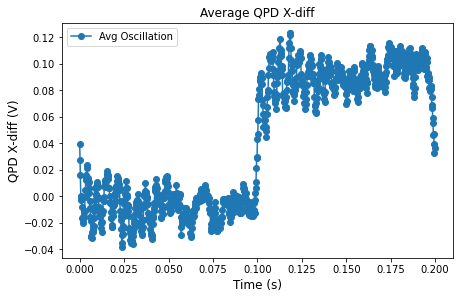

In [31]:
fig,ax = plt.subplots(figsize=(7,7/1.618)) #create figure

ax.plot(time_of_cycle, avg_qpd_signal,'-o', label="Avg Oscillation")

plt.title("Average QPD X-diff")

ax.set_xlabel("Time (s)", fontsize=12, color='k')
ax.set_ylabel("QPD X-diff (V)", fontsize=12)

plt.legend()

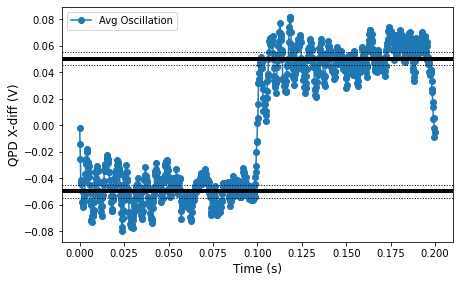

In [32]:
fig,ax = plt.subplots(figsize=(7,7/1.618)) #create figure

ax.plot(time_of_cycle, avg_qpd_signal - avg_qpd_signal.mean(),'-o', label="Avg Oscillation")

guess_qpd_signal = 0.050
guess_error = 0.005
ax.axhline(guess_qpd_signal, c='k', lw=4)
ax.axhline(-1*guess_qpd_signal, c='k', lw=4)
ax.axhline(guess_qpd_signal + guess_error, ls=':', c='k', lw=1)
ax.axhline(guess_qpd_signal - guess_error, ls=':', c='k', lw=1)
ax.axhline(-1*guess_qpd_signal + guess_error, ls=':', c='k', lw=1)
ax.axhline(-1*guess_qpd_signal - guess_error, ls=':', c='k', lw=1)


ax.set_xlabel("Time (s)", fontsize=12, color='k')
ax.set_ylabel("QPD X-diff (V)", fontsize=12)

plt.legend()

<IPython.core.display.Javascript object>


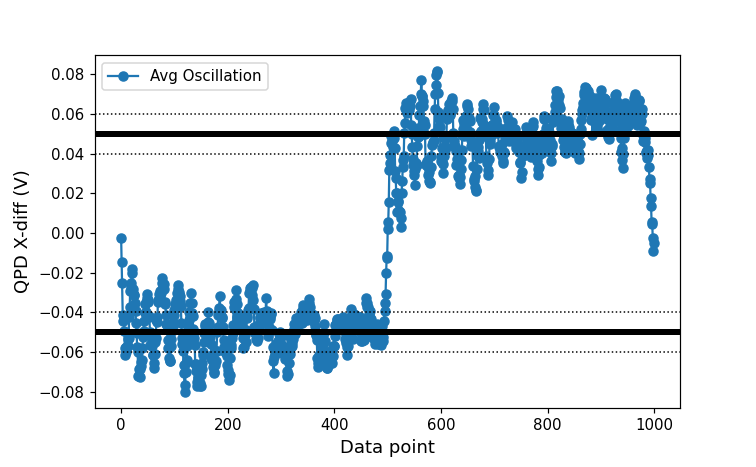

In [35]:
%matplotlib notebook

fig,ax = plt.subplots(figsize=(7,7/1.618)) #create figure

ax.plot(avg_qpd_signal - avg_qpd_signal.mean(),'-o', label="Avg Oscillation")

guess_qpd_signal = 0.050
guess_error = 0.01
ax.axhline(guess_qpd_signal, c='k', lw=4)
ax.axhline(-1*guess_qpd_signal, c='k', lw=4)
ax.axhline(guess_qpd_signal + guess_error, ls=':', c='k', lw=1)
ax.axhline(guess_qpd_signal - guess_error, ls=':', c='k', lw=1)
ax.axhline(-1*guess_qpd_signal + guess_error, ls=':', c='k', lw=1)
ax.axhline(-1*guess_qpd_signal - guess_error, ls=':', c='k', lw=1)


ax.set_xlabel("Data point", fontsize=12, color='k')
ax.set_ylabel("QPD X-diff (V)", fontsize=12)

plt.legend()

In [34]:
print(np.mean(avg_qpd_signal[150:480] - avg_qpd_signal.mean()))
print(np.mean(avg_qpd_signal[650:950] - avg_qpd_signal.mean()))

print(np.std(avg_qpd_signal[150:480] - avg_qpd_signal.mean()))
print(np.std(avg_qpd_signal[650:950] - avg_qpd_signal.mean()))

-0.04998254679233503
0.05120259514237627
0.009876287690892327
0.010585986328880819
